In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Neurological-EEG_again/ICARE-Dataset.zip'

Archive:  /content/drive/MyDrive/Neurological-EEG_again/ICARE-Dataset.zip
  inflating: ICARE-Dataset/dataset.csv  


In [3]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [4]:
df = pd.read_csv('/content/ICARE-Dataset/dataset.csv')

In [5]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
df.shape

(11500, 180)

In [6]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [10]:
data = df.copy()

<ipython-input-11-76efa8e6c2a6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


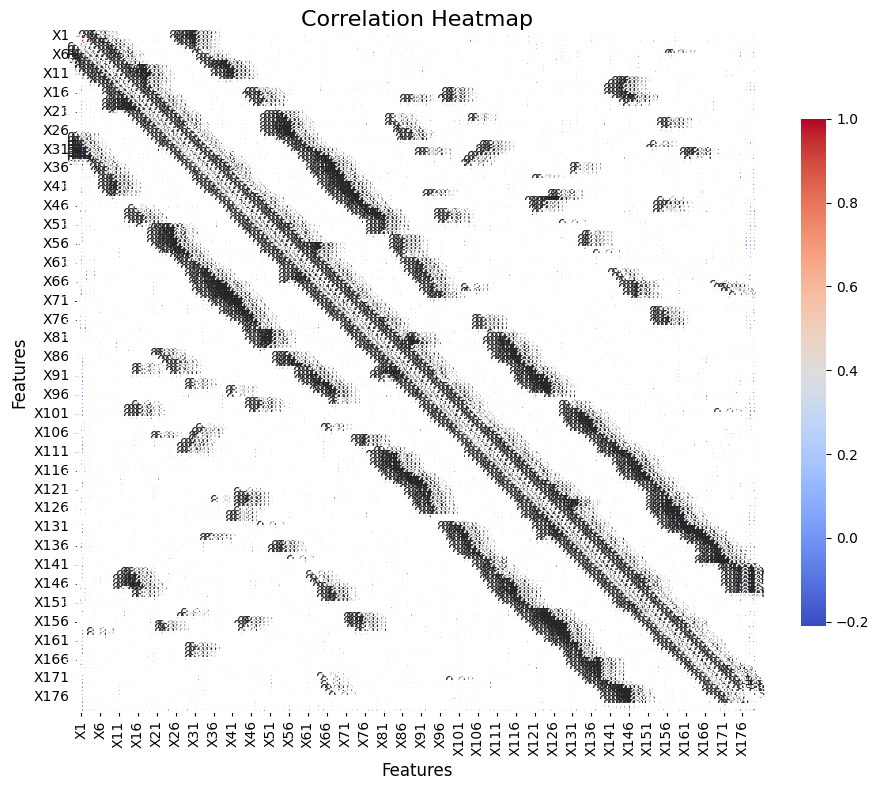

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a correlation matrix
corr = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={'shrink': 0.75})

# Title and labels with increased font size
plt.title("Correlation Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Ensure that labels fit within the figure
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
data_2=df.copy()

In [14]:
data_2 = data_2.drop(["Unnamed"], axis=1)

In [15]:
data_2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


In [16]:
x = data_2.drop(['y'], axis=1)
y=data_2['y']

In [18]:
y

0        4
1        1
2        5
3        5
4        5
        ..
11495    2
11496    1
11497    5
11498    3
11499    4
Name: y, Length: 11500, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training set
x_train_scaled = scaler.fit_transform(x_train)

# Scale the validation set
x_val_scaled = scaler.transform(x_val)

# Scale the test set
x_test_scaled = scaler.transform(x_test)


**LSTM**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [48]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Model initialization
model = Sequential()

# Adding LSTM layers with L2 regularization
model.add(LSTM(128, input_shape=(x_train_scaled.shape[1], 1), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))

# Adding Dense layer with L2 regularization
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [49]:
from tensorflow.keras.utils import to_categorical

num_classes = 5  # Number of classes in your dataset
y_train_encoded = to_categorical(y_train - 1, num_classes=num_classes)
y_test_encoded = to_categorical(y_test - 1, num_classes=num_classes)
y_val_encoded = to_categorical(y_val - 1, num_classes=num_classes)

In [50]:
# Train the model with regularization and early stopping
history = model.fit(x_train_scaled, y_train_encoded,
                    validation_data=(x_val_scaled, y_val_encoded),
                    epochs=100, batch_size=64,
                    callbacks=[early_stopping])


Epoch 1/100
108/108 [==============================] - 79s 698ms/step - loss: 1.9267 - accuracy: 0.3717 - val_loss: 1.3271 - val_accuracy: 0.4078
Epoch 2/100
108/108 [==============================] - 69s 634ms/step - loss: 1.2507 - accuracy: 0.3952 - val_loss: 1.2328 - val_accuracy: 0.3965
Epoch 3/100
108/108 [==============================] - 69s 633ms/step - loss: 1.2912 - accuracy: 0.3820 - val_loss: 1.2506 - val_accuracy: 0.3852
Epoch 4/100
108/108 [==============================] - 74s 682ms/step - loss: 1.2457 - accuracy: 0.3843 - val_loss: 1.2042 - val_accuracy: 0.4278
Epoch 5/100
108/108 [==============================] - 71s 657ms/step - loss: 1.2599 - accuracy: 0.3984 - val_loss: 1.2627 - val_accuracy: 0.3804
Epoch 6/100
108/108 [==============================] - 71s 655ms/step - loss: 1.2934 - accuracy: 0.3771 - val_loss: 1.2613 - val_accuracy: 0.4543
Epoch 7/100
108/108 [==============================] - 71s 656ms/step - loss: 1.3300 - accuracy: 0.3883 - val_loss: 1.3247 -

Predictions

In [52]:
# Predict probabilities for each class
y_prob = model.predict(x_test_scaled)

# Get predicted classes by finding the class with the highest probability
y_pred = y_prob.argmax(axis=-1) + 1  # Adding 1 to match your class labels (if they start from 1)

# Now, use y_pred for evaluation metrics


72/72 [==============================] - 16s 223ms/step


Confusion matrix

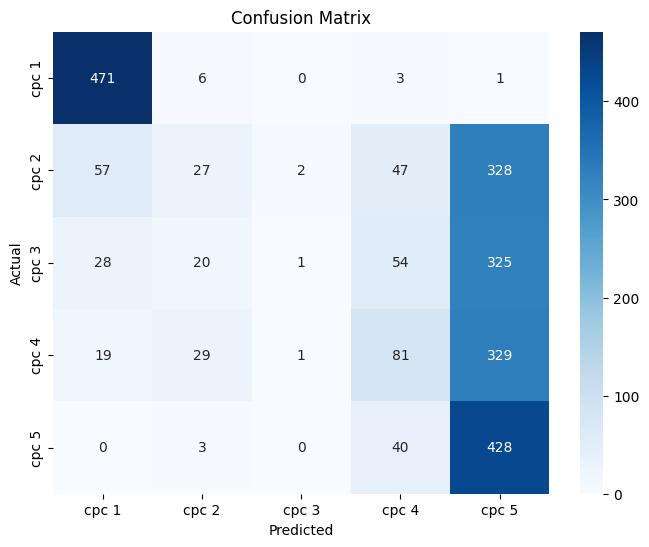

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['cpc 1', 'cpc 2', 'cpc 3',  'cpc 4', 'cpc 5'],
            yticklabels=['cpc 1', 'cpc 2', 'cpc 3', 'cpc 4', 'cpc 5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Precision recall

In [54]:
from sklearn.preprocessing import LabelBinarizer

# Assuming y_test contains integer labels for classes
label_binarizer = LabelBinarizer()
y_test_encoded = label_binarizer.fit_transform(y_test)


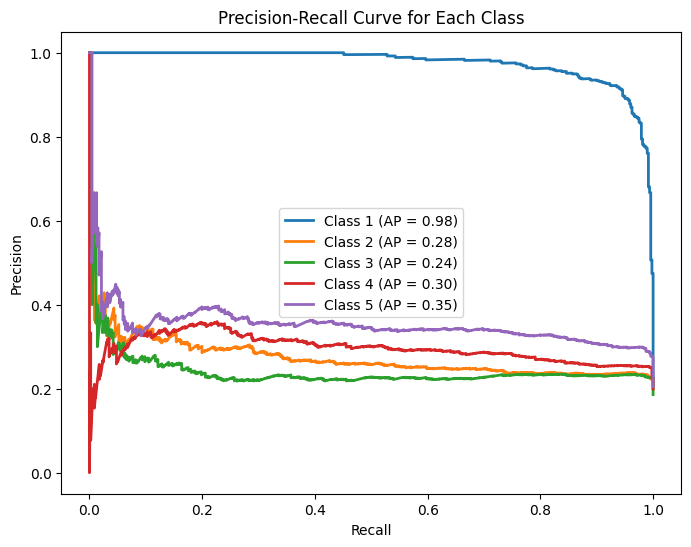

In [55]:
# Calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_encoded[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_encoded[:, i], y_prob[:, i])

# Plotting precision-recall curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i+1} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.show()
